In [1]:
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
data = pd.read_excel('loss01.xlsx')

In [3]:
data.head()

,Kscraper=,Unnamed: 1,0.00976575387660838,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,начальные координаты,NaN,NaN,NaN,NaN,начальные координаты оставшихся частиц,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,x,y,de,s,NaN,xxa,yya,dea,s,...,Ошибки,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,DX0B,DX0Q,DX0S,0.0,0.0,0.0,Npart,35672.0,"bx,m",15.673888
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DY0B,DY0Q,DY0S,0.0,0.0,0.0,deltP,0.0,ax,0.005536


In [4]:
data = data.iloc[:,16:59]

In [5]:
lost1 = data.iloc[:,[23,24,26]]
lost1 = lost1.iloc[2:-1]
lost1 = lost1.dropna()
lost1.columns = lost1.iloc[0]
lost1 = lost1.iloc[1:-1].reset_index(drop=True)

In [6]:
lost_angle = data.iloc[:,[39,40,41]]
lost_angle = lost_angle.iloc[3:-1]
lost_angle = lost_angle.dropna()
lost_angle.columns = ['s', 'px', 'py']
lost_angle = lost_angle.iloc[1:-1].reset_index(drop=True)

In [7]:
ellipse_coord = pd.read_excel('loss01.xlsx', sheet_name=2).iloc[9:-1, [3,4]]

In [8]:
ellipse_coord.columns = ['ax', 'ay']

In [9]:
ellipse_coord.reset_index(drop=True, inplace=True)

In [10]:
ellipse_coord

,ax,ay
0,0.013500,0.000000
1,0.013433,-0.001348
2,0.013231,-0.002682
3,0.012897,-0.003990
4,0.012434,-0.005257
...,...,...
59,0.012521,0.005047
60,0.012962,0.003772
61,0.013274,0.002459
62,0.013453,0.001122


Text(0.5, 0, 'x, m')

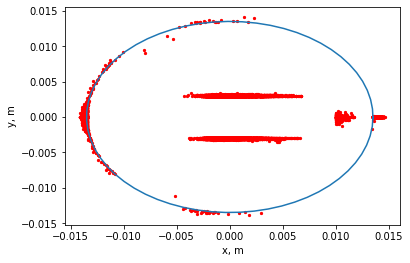

In [11]:
plt.scatter(lost1.x, lost1.y, c='red', s=5)
plt.plot(ellipse_coord.ax, ellipse_coord.ay)
plt.ylabel('y, m')
plt.xlabel('x, m')

In [12]:
super_per = 29.609
blade_periods = [(i*super_per , 1+i*super_per) for i in range(0,15)] + [(i*super_per-1, i*super_per) for i in range(1,16)]
lin_periods = [(i*super_per , 4.337+i*super_per) for i in range(0,15)] + [(i*super_per-4.337, i*super_per) for i in range(1,16)]

In [13]:
k=0
lost1['is_blade'] = 0
lost_angle['is_blade'] = 0
lost1['is_lin'] = 0
lost_angle['is_lin'] = 0
for i in blade_periods:
    k+=1
    lost1[f'period{k}'] = lost1.s.between(i[0],i[1]).astype(int)
    lost1['is_blade'] += lost1[f'period{k}']
    lost1.drop(f'period{k}', axis=1, inplace=True)
    
    lost_angle[f'period{k}'] = lost_angle.s.between(i[0],i[1]).astype(int)
    lost_angle['is_blade'] += lost_angle[f'period{k}']
    lost_angle.drop(f'period{k}', axis=1, inplace=True)
    
k=0
for i in lin_periods:
    k+=1
    lost1[f'period{k}'] = lost1.s.between(i[0],i[1]).astype(int)
    lost1['is_lin'] += lost1[f'period{k}']
    lost1.drop(f'period{k}', axis=1, inplace=True)
    
    lost_angle[f'period{k}'] = lost_angle.s.between(i[0],i[1]).astype(int)
    lost_angle['is_lin'] += lost_angle[f'period{k}']
    lost_angle.drop(f'period{k}', axis=1, inplace=True)


Text(0.5, 0, 'x, m')

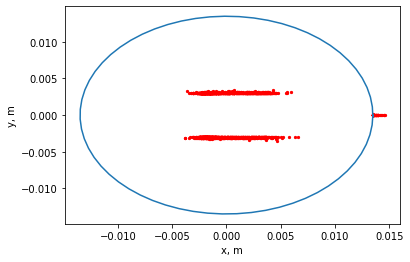

In [14]:
mag_blade_distrib_df = lost1.loc[lost1.is_blade==1].drop('is_blade', axis=1)
plt.scatter(mag_blade_distrib_df.x, mag_blade_distrib_df.y, c='red', s=5)
plt.plot(ellipse_coord.ax, ellipse_coord.ay)
plt.ylabel('y, m')
plt.xlabel('x, m')

Text(0.5, 0, 'x, m')

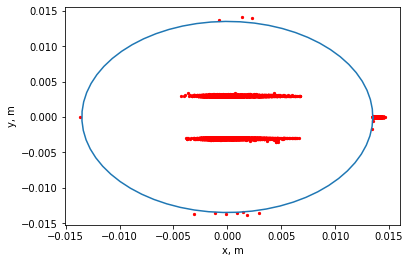

In [15]:
mag_lin_distrib_df = lost1.loc[lost1.is_lin==1].drop('is_lin', axis=1)
plt.scatter(mag_lin_distrib_df.x, mag_lin_distrib_df.y, c='red', s=5)
plt.plot(ellipse_coord.ax, ellipse_coord.ay)
plt.ylabel('y, m')
plt.xlabel('x, m')

Text(0.5, 0, 'px, m')

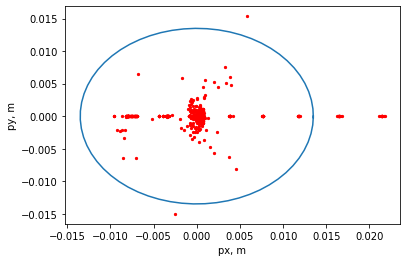

In [23]:
angle_lin_distrib_df = lost_angle.loc[lost1.is_lin==1].drop(['is_blade','is_lin'], axis=1)
plt.scatter(angle_lin_distrib_df.px, angle_lin_distrib_df.py, c='red', s=5)
plt.plot(ellipse_coord.ax, ellipse_coord.ay)
plt.ylabel('py, m')
plt.xlabel('px, m')

(array([100.,  40.,  94., 418.,  22.,  13.,  12.,   0.,  13.,  12.]),
 array([-0.00963103, -0.006492  , -0.00335297, -0.00021394,  0.00292509,
         0.00606412,  0.00920315,  0.01234218,  0.01548121,  0.01862024,
         0.02175927]),
 <BarContainer object of 10 artists>)

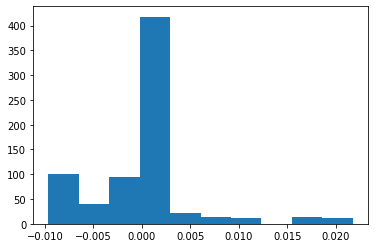

In [17]:
plt.hist(angle_lin_distrib_df.px, bins=10)

(array([  1.,   0.,   4.,   8., 586., 113.,   9.,   2.,   0.,   1.]),
 array([-0.01503434, -0.01199456, -0.00895478, -0.00591501, -0.00287523,
         0.00016455,  0.00320433,  0.0062441 ,  0.00928388,  0.01232366,
         0.01536344]),
 <BarContainer object of 10 artists>)

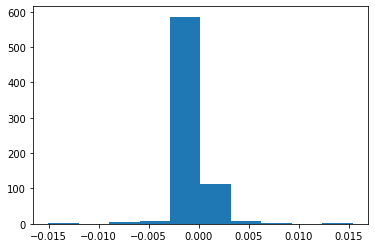

In [18]:
plt.hist(angle_lin_distrib_df.py, bins=10)

In [24]:
angle_blade_distrib_df = lost_angle.loc[lost1.is_blade==1].drop(['is_blade','is_lin'], axis=1)

In [25]:
angle_lin_distrib_df

,s,px,py
0,3.350001,-0.002565,-1.503434e-02
1,3.400002,-0.002819,1.595104e-04
2,26.408804,0.021109,2.529420e-07
3,26.518805,0.016644,-3.143396e-06
4,26.578805,0.011692,3.975648e-07
...,...,...,...
1079,463.377577,0.000343,-1.154828e-05
1080,466.084977,-0.005198,-4.341619e-04
1081,469.387927,-0.007113,9.742362e-07
1082,469.458852,-0.006981,-1.278213e-06


In [26]:
angle_lin_distrib_df.to_csv('angles_all_lin.csv', index=False)
angle_blade_distrib_df.to_csv('angles_1m_lin.csv', index=False)